# LINEAR REGRESSION:

# Approaches:
1.Load data & libraries.
2.Data Preparation & transformation.
3.Visualization.
4.Analysis:
    -Uni-variate
    -Bi-variate(correlation and chi-square)
    -Muti-variate:
        1.supervised:
            ! Regression.
            ! Classification.
        2.Unsupervised:
            !Dimensionality Reduction.
            ! Clustering.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train = pd.read_csv("C:/Users/DELL/OneDrive/Documents/HousePrices.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [5]:
train.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploaratory Data Analysis: (Uni-Variate & Bi-Variate)

For Continous variable:

In [6]:
train.describe()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2073.000000,2073.000000,1753.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,916.132176,60.556199,72.056475,10717.853353,6.233478,5.835022,1969.445731,1986.617463,101.875668,437.949349,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,493.014670,159.924810,27.987475,9215.982306,1.517115,1.360214,30.222647,20.432694,179.169217,448.051119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,519.000000,20.000000,60.000000,7620.000000,5.000000,5.000000,1950.000000,1970.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,932.000000,50.000000,70.000000,9492.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,1302.000000,70.000000,83.000000,11601.000000,7.000000,7.000000,1999.000000,2004.000000,161.500000,708.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1820.000000,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.skew()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\3574648760.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


Id                     -0.033712
Dwell_Type             40.872292
LotFrontage             3.448015
LotArea                11.239413
OverallQual             0.196350
OverallCond             0.649335
YearBuilt              -0.516261
YearRemodAdd           -0.579862
MasVnrArea              2.576900
BsmtFinSF1              1.468890
BsmtFinSF2              4.027937
BsmtUnfSF               0.924212
TotalBsmtSF             1.156452
1stFlrSF                1.247346
2ndFlrSF                0.808616
LowQualFinSF            8.652420
GrLivArea               1.169644
BsmtFullBath            0.619665
BsmtHalfBath            4.169617
FullBath               -0.045613
HalfBath                0.674001
BedroomAbvGr            0.123019
KitchenAbvGr            4.312676
TotRmsAbvGrd            0.721687
Fireplaces              0.625415
GarageYrBlt            -0.700172
GarageCars             -0.373705
GarageArea              0.135391
WoodDeckSF              1.763668
OpenPorchSF             2.257522
EnclosedPo

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\4055251463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Dwell_Type'] , kde = True)


<Axes: xlabel='Dwell_Type', ylabel='Density'>

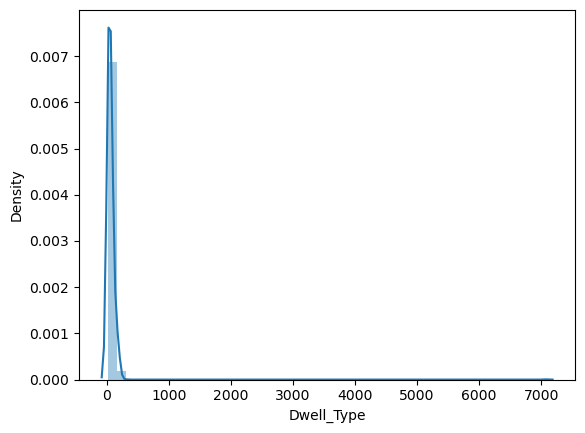

In [8]:
sns.distplot(train['Dwell_Type'] , kde = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\3145458143.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LotArea'] , kde = True)


<Axes: xlabel='LotArea', ylabel='Density'>

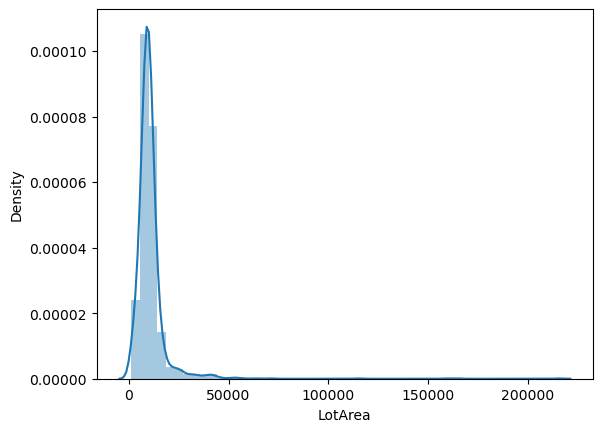

In [9]:
sns.distplot(train['LotArea'] , kde = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\1016613665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['YearBuilt'] , kde = True)


<Axes: xlabel='YearBuilt', ylabel='Density'>

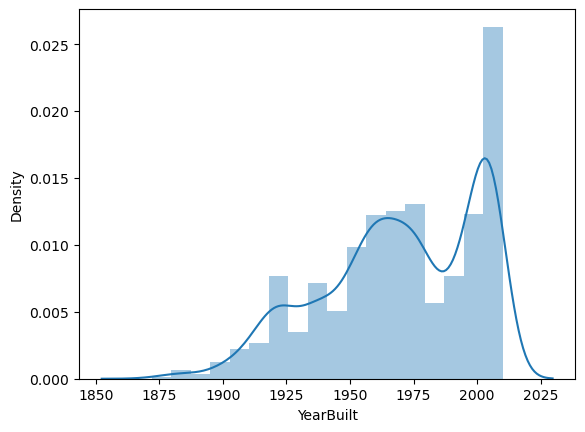

In [10]:
sns.distplot(train['YearBuilt'] , kde = True)

YearBuilt : No Normal Distribution
    Negative skew occurs

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\2531418643.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['YearRemodAdd'] , kde = True)


<Axes: xlabel='YearRemodAdd', ylabel='Density'>

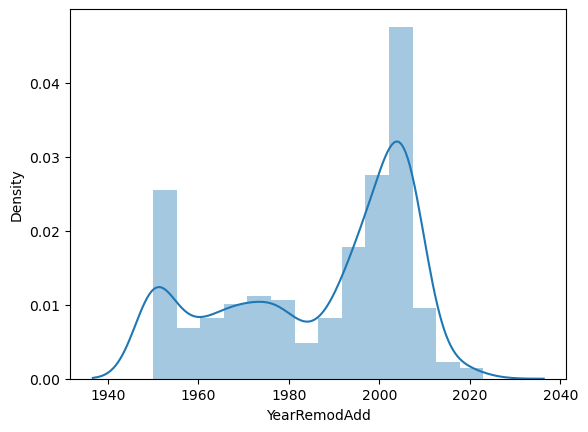

In [11]:
sns.distplot(train['YearRemodAdd'] , kde = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\3286731315.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['MasVnrArea'] , kde = True)


<Axes: xlabel='MasVnrArea', ylabel='Density'>

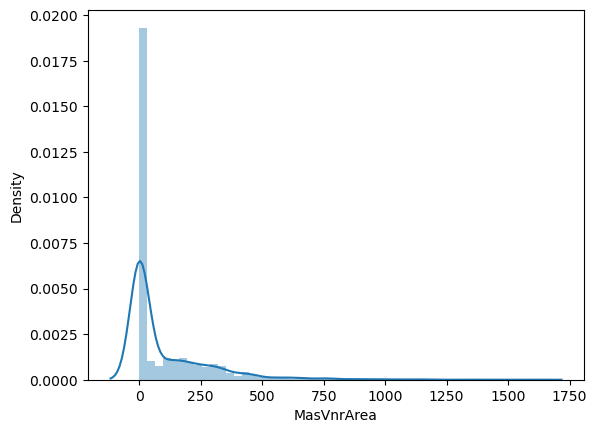

In [12]:
sns.distplot(train['MasVnrArea'] , kde = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\2387253246.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['BsmtFinSF1'] , kde = True)


<Axes: xlabel='BsmtFinSF1', ylabel='Density'>

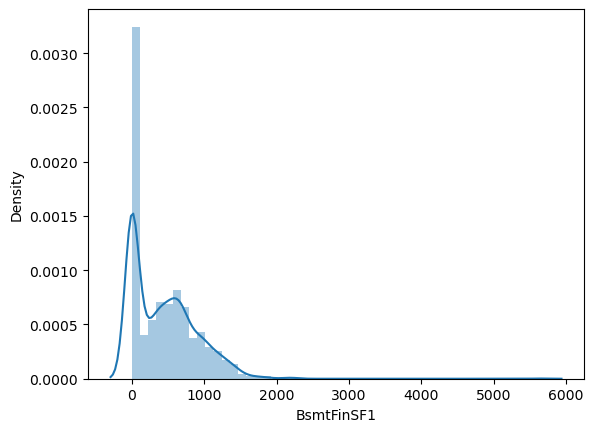

In [13]:
sns.distplot(train['BsmtFinSF1'] , kde = True) 

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\3366634240.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['GrLivArea'] , kde = True)


<Axes: xlabel='GrLivArea', ylabel='Density'>

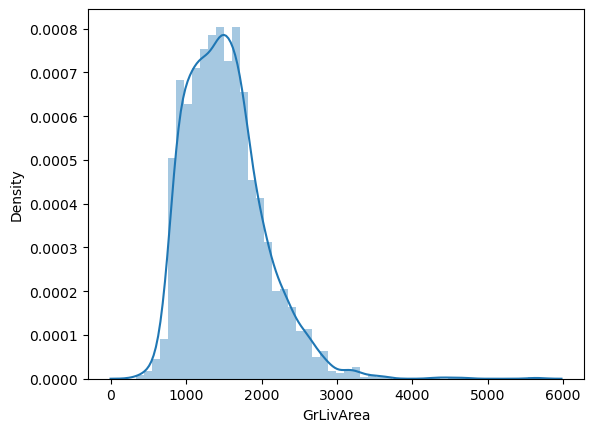

In [14]:
sns.distplot(train['GrLivArea'] , kde = True) 

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\3259013995.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['GarageYrBlt'] , kde = True)


<Axes: xlabel='GarageYrBlt', ylabel='Density'>

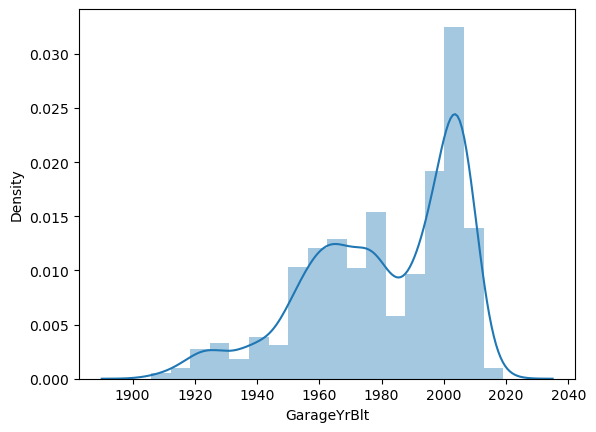

In [15]:
sns.distplot(train['GarageYrBlt'] , kde = True) 

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\1527033550.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['GarageArea'] , kde = True)


<Axes: xlabel='GarageArea', ylabel='Density'>

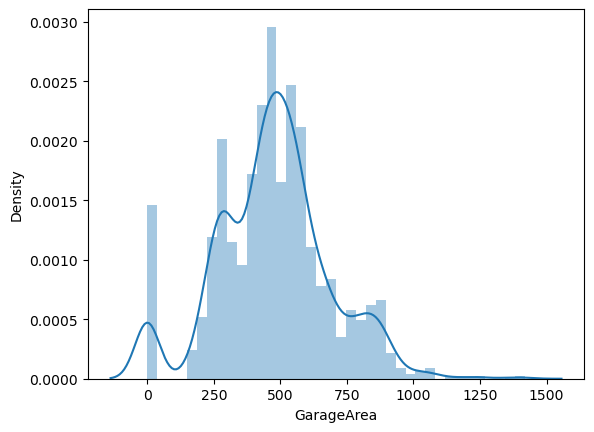

In [16]:
sns.distplot(train['GarageArea'] , kde = True) 

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\417861525.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['YrSold'] , kde = True)


<Axes: xlabel='YrSold', ylabel='Density'>

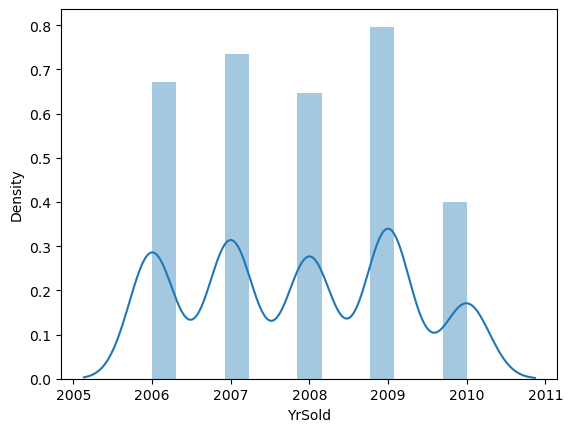

In [17]:
sns.distplot(train['YrSold'] , kde = True) 

For Categorical Data:

<Axes: >

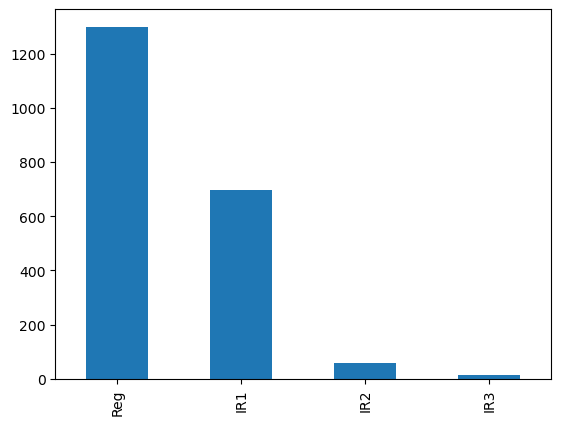

In [18]:
train['Property_Shape'].value_counts().plot(kind = 'bar')

<Axes: >

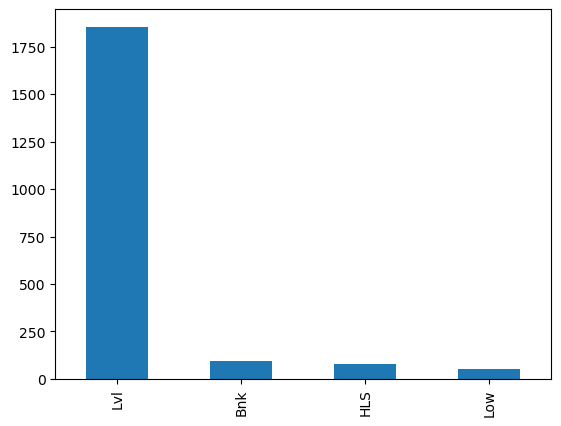

In [19]:
train['LandContour'].value_counts().plot(kind = 'bar')

<Axes: >

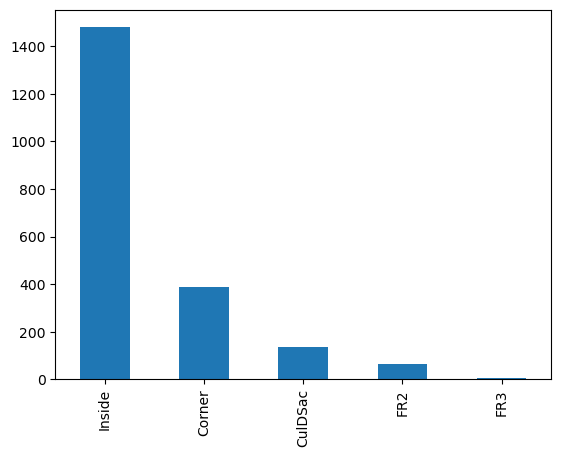

In [20]:
train['LotConfig'].value_counts().plot(kind = 'bar')

<Axes: >

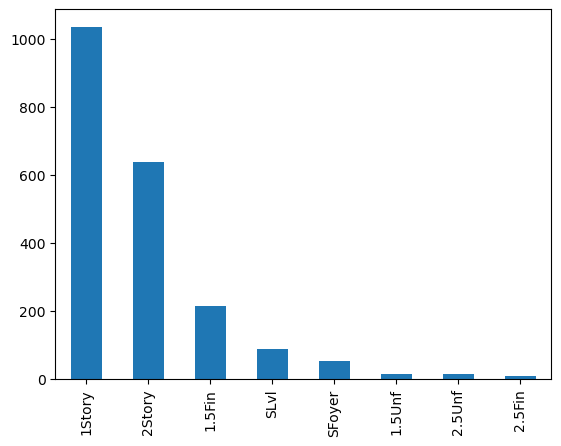

In [21]:
train['HouseStyle'].value_counts().plot(kind = 'bar')

<Axes: >

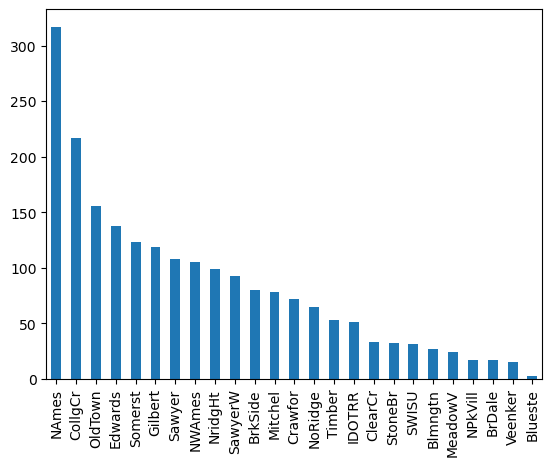

In [22]:
train['Neighborhood'].value_counts().plot(kind = 'bar')

Bi-Variate Analysis
    Categorical : Chi-Square.

<Axes: >

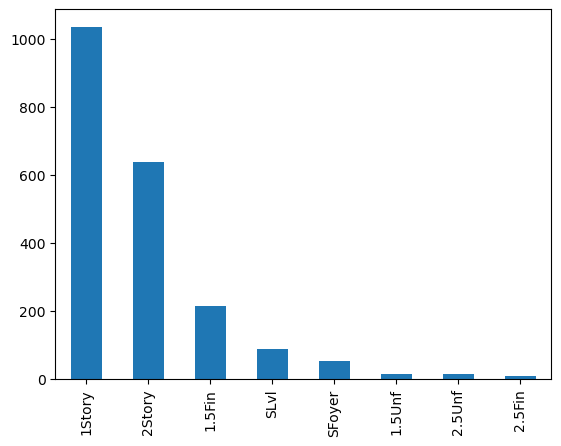

In [23]:
train['HouseStyle'].value_counts().plot(kind = 'bar')

In [24]:
from scipy.stats import chi2_contingency

In [25]:
def chi2_sq_test(var1, var2):
    contingency_table = pd.crosstab(var1, var2)
    _,pvalue,_,_ = chi2_contingency(contingency_table)
    if pvalue< 0.05:
        print('Accept the alternative hypothesis ', round(pvalue,2))
    else: 
        print('Don not Accept the alternative hypothesis', round(pvalue,2) )
    return contingency_table

In [26]:
chi2_sq_test(train['Zone_Class'], train['Property_Shape'])

Accept the alternative hypothesis  0.0


Property_Shape,IR1,IR2,IR3,Reg
Zone_Class,,,,
C (all),2,0,0,12
FV,20,3,0,79
RH,3,1,0,18
RL,638,50,13,910
RM,35,6,2,281


In [27]:
chi2_sq_test(train['Road_Type'], train['Property_Shape'])

Accept the alternative hypothesis  0.0


Property_Shape,IR1,IR2,IR3,Reg
Road_Type,,,,
Grvl,1,4,0,5
Pave,697,56,15,1295


In [28]:
chi2_sq_test(train['LotConfig'], train['Property_Shape'])

Accept the alternative hypothesis  0.0


Property_Shape,IR1,IR2,IR3,Reg
LotConfig,,,,
Corner,160,16,2,208
CulDSac,114,17,2,4
FR2,18,6,0,41
FR3,1,0,0,3
Inside,405,21,11,1044


In [29]:
chi2_sq_test(train['Exterior1st'], train['Exterior2nd'])

Accept the alternative hypothesis  0.0


Exterior2nd,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng
Exterior1st,,,,,,,,,,,,,,,,
AsbShng,21,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0
AsphShn,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkComm,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
BrkFace,1,0,0,34,0,0,5,0,0,0,7,5,1,0,18,1
CBlock,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
CemntBd,0,0,0,0,0,84,0,0,0,0,0,0,0,0,1,2
HdBoard,0,1,0,0,0,0,269,2,1,0,36,0,0,0,3,4
ImStucc,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
MetalSd,0,1,0,0,0,0,5,0,297,0,0,0,2,0,2,1


In [30]:
chi2_sq_test(train['LandSlope'], train['Property_Shape'])

Accept the alternative hypothesis  0.0


Property_Shape,IR1,IR2,IR3,Reg
LandSlope,,,,
Gtl,646,46,14,1252
Mod,44,11,0,46
Sev,8,3,1,2


In [31]:
chi2_sq_test(train['Neighborhood'], train['Property_Shape'])

Accept the alternative hypothesis  0.0


Property_Shape,IR1,IR2,IR3,Reg
Neighborhood,,,,
Blmngtn,0,0,0,27
Blueste,0,0,0,3
BrDale,0,0,0,17
BrkSide,25,0,0,55
ClearCr,15,5,0,13
CollgCr,75,14,1,127
Crawfor,38,0,0,34
Edwards,25,0,1,112
Gilbert,69,15,8,27


In [32]:
chi2_sq_test(train['RoofStyle'], train['RoofMatl'])

Accept the alternative hypothesis  0.0


RoofMatl,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl
RoofStyle,,,,,,,,
Flat,0,1,1,1,0,16,0,0
Gable,0,1596,0,0,1,1,0,8
Gambrel,0,15,0,0,0,0,0,0
Hip,1,414,0,0,0,0,3,2
Mansard,0,9,0,0,0,0,2,0
Shed,0,1,0,0,0,0,1,0


In [33]:
chi2_sq_test(train['SaleCondition'], train['Property_Shape'])

Don not Accept the alternative hypothesis 0.42


Property_Shape,IR1,IR2,IR3,Reg
SaleCondition,,,,
Abnorml,51,2,0,102
AdjLand,2,0,0,3
Alloca,3,0,0,16
Family,5,0,1,18
Normal,572,54,12,1057
Partial,65,4,2,104


# Bi-Variate Analysis:
    Continous : correlation.

C:\Users\DELL\AppData\Local\Temp\ipykernel_14440\1524494364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

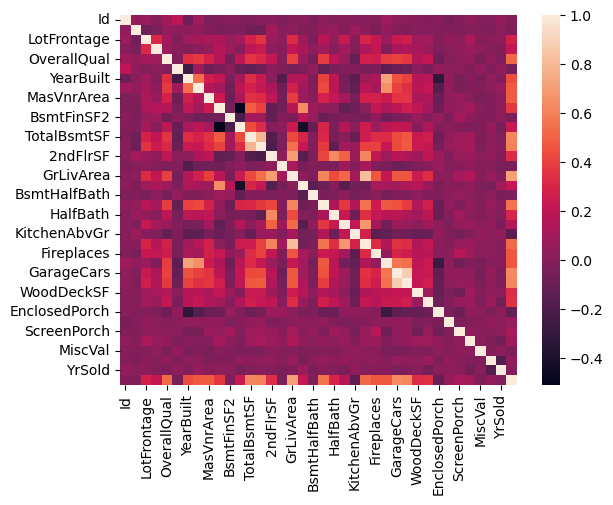

In [34]:
sns.heatmap(train.corr())

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

# DATA PREPARATION:

In [40]:
def data_prep(data):
#Imputation of Missing Values

    data['MasVnrArea'] = np.where(data['MasVnrArea'].isna(), 
                                data['MasVnrArea'].median(skipna=True),data['MasVnrArea'])
    data['LotFrontage'] = np.where(data['LotFrontage'].isna(), 
                                data['LotFrontage'].median(skipna=True),data['LotFrontage'])
    data['GarageYrBlt'] = np.where(data['GarageYrBlt'].isna(), 
                                data['GarageYrBlt'].median(skipna=True),data['GarageYrBlt'])
    
    
    
    data['BsmtQual'] = np.where(data['BsmtQual'].isna(),
                                data['BsmtQual'].mode(dropna = True)[0], data['BsmtQual'])
    data['MasVnrType'] = np.where(data['MasVnrType'].isna(),
                                data['MasVnrType'].mode(dropna = True)[0], data['MasVnrType'])
    data['BsmtCond'] = np.where(data['BsmtCond'].isna(),
                                data['BsmtCond'].mode(dropna = True)[0], data['BsmtCond'])
    data['BsmtExposure'] = np.where(data['BsmtExposure'].isna(),
                                data['BsmtExposure'].mode(dropna = True)[0], data['BsmtExposure'])
    data['BsmtFinType1'] = np.where(data['BsmtFinType1'].isna(),
                                data['BsmtFinType1'].mode(dropna = True)[0], data['BsmtFinType1'])
    data['GarageType'] = np.where(data['GarageType'].isna(),
                                data['GarageType'].mode(dropna = True)[0], data['GarageType'])
    data['GarageFinish'] = np.where(data['GarageFinish'].isna(),
                                data['GarageFinish'].mode(dropna = True)[0], data['GarageFinish'])
    data['GarageQual'] = np.where(data['GarageQual'].isna(),
                                data['GarageQual'].mode(dropna = True)[0], data['GarageQual'])
    data['GarageCond'] = np.where(data['GarageCond'].isna(),
                                data['GarageCond'].mode(dropna = True)[0], data['GarageCond'])
    
    
   
    
    data['MasVnrArea'] = data['MasVnrArea'].astype('int')
    data['LotFrontage'] = data['LotFrontage'].astype('int')
    data['GarageYrBlt'] = data['GarageYrBlt'].astype('int')
    return data

In [41]:
data_prep(train)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,70,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   2073 non-null   int64 
 1   Dwell_Type           2073 non-null   int64 
 2   Zone_Class           2073 non-null   object
 3   LotFrontage          2073 non-null   int32 
 4   LotArea              2073 non-null   int64 
 5   Road_Type            2073 non-null   object
 6   Alley                129 non-null    object
 7   Property_Shape       2073 non-null   object
 8   LandContour          2073 non-null   object
 9   Utilities            2073 non-null   object
 10  LotConfig            2073 non-null   object
 11  LandSlope            2073 non-null   object
 12  Neighborhood         2073 non-null   object
 13  Condition1           2073 non-null   object
 14  Condition2           2073 non-null   object
 15  Dwelling_Type        2073 non-null   object
 16  HouseS

# ONE HOT ENCODING :

In [43]:
train_enc = pd.get_dummies(train)

In [44]:
train_enc.head()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65,8450,7,5,2003,2003,196,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80,9600,6,8,1976,1976,0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68,11250,7,5,2001,2002,162,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60,9550,7,5,1915,1970,0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84,14260,8,5,2000,2000,350,655,...,0,0,0,1,0,0,0,0,1,0


In [45]:
y = train_enc['Property_Sale_Price']
x = train_enc.drop('Property_Sale_Price',axis=1)
print(y.shape)
print(x.shape)

(2073,)
(2073, 289)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42)

In [47]:
X_train.head()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1743,1744,80,73,9674,7,4,2010,2023,442,786,...,0,0,0,1,0,0,0,0,1,0
1640,1641,20,98,10942,4,4,1958,1983,0,457,...,0,0,0,1,0,0,0,0,1,0
2028,902,20,64,8712,9,4,1980,2000,0,860,...,0,0,0,1,0,0,0,0,1,0
1432,1433,30,60,10800,9,6,1927,2007,0,0,...,0,0,0,1,0,0,0,0,1,0
1586,1587,85,77,10786,6,7,1991,2003,0,747,...,0,0,0,1,0,0,0,0,1,0


In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1658, 289)
(415, 289)
(1658,)
(415,)


# APPLYING LINEAR REGESSION:

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
print(lr.intercept_)

-373502.24920501467


In [51]:
print(lr.coef_)

[-5.30474176e-01 -1.78367566e+00  3.21711354e+01  4.42998497e-01
  9.61533293e+02  1.95696744e+03  4.69770754e+01  6.12562731e+01
  3.42101270e+01  1.90189357e+01  1.47001335e+00  6.14094839e-01
  2.11030387e+01  2.48697830e+01  2.67746534e+01 -2.70269744e+01
  2.46174582e+01 -4.86331399e+01  3.13192304e+02  6.09799494e+03
  4.07805298e+03 -3.60061755e+03 -1.79609724e+04  2.21601937e+03
  6.52356130e+03 -7.49718880e+01  1.92866896e+03  2.10281259e+01
  1.49378675e+01  1.85206454e+01  1.04136416e+01  4.24350836e+01
  3.26745924e+01  9.09968416e+01  2.21270612e+00 -3.64323585e+02
  7.46758747e+01 -2.22625462e+04  7.03634246e+01  1.38178747e+04
  4.67328311e+03  3.70102495e+03 -2.29225919e+04  2.29225919e+04
 -5.22877163e+02  7.21547432e+03 -4.99534911e+03  1.57709368e+03
  7.17602291e+03 -3.75776748e+03 -2.42937192e+03  8.34125070e+03
 -9.28169486e+03  3.36981607e+03  2.39901862e+04 -2.39901862e+04
  1.64924812e+03  9.55458003e+03 -6.16528973e+03 -6.08867481e+03
  1.05013640e+03  1.18160

In [52]:
for coef, feature in zip(lr.coef_, X_train.columns):
    print(f"{feature}: {coef:.2f}")  # Format to 4 decimal places

Id: -0.53
Dwell_Type: -1.78
LotFrontage: 32.17
LotArea: 0.44
OverallQual: 961.53
OverallCond: 1956.97
YearBuilt: 46.98
YearRemodAdd: 61.26
MasVnrArea: 34.21
BsmtFinSF1: 19.02
BsmtFinSF2: 1.47
BsmtUnfSF: 0.61
TotalBsmtSF: 21.10
1stFlrSF: 24.87
2ndFlrSF: 26.77
LowQualFinSF: -27.03
GrLivArea: 24.62
BsmtFullBath: -48.63
BsmtHalfBath: 313.19
FullBath: 6097.99
HalfBath: 4078.05
BedroomAbvGr: -3600.62
KitchenAbvGr: -17960.97
TotRmsAbvGrd: 2216.02
Fireplaces: 6523.56
GarageYrBlt: -74.97
GarageCars: 1928.67
GarageArea: 21.03
WoodDeckSF: 14.94
OpenPorchSF: 18.52
EnclosedPorch: 10.41
3SsnPorch: 42.44
ScreenPorch: 32.67
PoolArea: 91.00
MiscVal: 2.21
MoSold: -364.32
YrSold: 74.68
Zone_Class_C (all): -22262.55
Zone_Class_FV: 70.36
Zone_Class_RH: 13817.87
Zone_Class_RL: 4673.28
Zone_Class_RM: 3701.02
Road_Type_Grvl: -22922.59
Road_Type_Pave: 22922.59
Alley_Grvl: -522.88
Alley_Pave: 7215.47
Property_Shape_IR1: -4995.35
Property_Shape_IR2: 1577.09
Property_Shape_IR3: 7176.02
Property_Shape_Reg: -3757.7

# Evaluating the model:

In [53]:
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

In [54]:
y_hat_train

array([204166.86923935, 133583.9422812 , 153008.91480552, ...,
       161794.50229159, 108334.2151466 , 173045.86662055])

In [55]:
y_hat_test

array([114048.11482033, 144569.0510825 , 144209.88016416, 280650.78413083,
       239349.16729348, 110016.37259098, 221905.10233913, 140750.80087883,
       237244.74514596, 140188.02267356, 109467.9828443 , 133222.3604553 ,
       116259.97345046, 201160.90774074, 458591.27949461, 324251.09159991,
       101982.56338274, 136226.36670364, 143573.70605955, 264255.37220004,
       129012.1651219 , 296541.97957562, 124901.53338445, 130795.15986896,
       212211.69942948, 236295.12990054, 123519.22892167, 217195.81949459,
       108580.85832221, 121371.59085162, 262460.30415494, 143572.02615863,
       161737.63404945, 434924.07153207, 232595.99824991, 194858.72774265,
       212313.58659117, 258853.47695073, 283585.83935276, 100602.83341179,
       105501.9330495 , 337754.21323632, 134856.194722  , 163307.99137902,
       147429.49352774, 130033.26427548,  26544.01413331, 142241.99139651,
       130233.97216817, 231777.35917339, 174419.13289471, 106764.04621446,
       198958.09830795, 1

In [56]:
rmse_train=np.sqrt(mean_squared_error(y_train,y_hat_train))
print("The RMSE for the model is:", round(rmse_train,2))

The RMSE for the model is: 20455.43


In [57]:
rmse_test=np.sqrt(mean_squared_error(y_test,y_hat_test))
print("The RMSE for the model is:", round(rmse_test,2))

The RMSE for the model is: 27845.68


In [58]:
r2_score_train = (r2_score(y_train, y_hat_train))
print('The R-squared for the model is: ', round(r2_score_train,2))

The R-squared for the model is:  0.93


In [59]:
r2_score_test = (r2_score(y_test, y_hat_test))
print('The R-squared for the model is: ', round(r2_score_test,2))

The R-squared for the model is:  0.87


# APPLYING DECISION TREE:

In [60]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
y_hat_train_dtree = dtree.predict(X_train)
y_hat_test_dtree = dtree.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix

In [68]:
print("r2 score of the model for train data is:",round(r2_score(y_train,y_hat_train_dtree),2))

r2 score of the model for train data is: 1.0


The r2 score for train is :1.0. Because of 1 our train data is very good.
    

In [69]:
print("r2 score of the model for test data is:",round(r2_score(y_test,y_hat_test_dtree),2))

r2 score of the model for test data is: 0.81


1.The r2 score for test data = 0.8. Diff bet train and test is 0.2.

In [70]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_hat_train_dtree))
print(round(rmse_train,2))

0.0


In [71]:
rmse_test_model = np.sqrt(mean_squared_error(y_test,y_hat_test_dtree))
print(round(rmse_test_model,2))

33632.27


Text(0.5, 1.0, 'tree for the prediction columns')

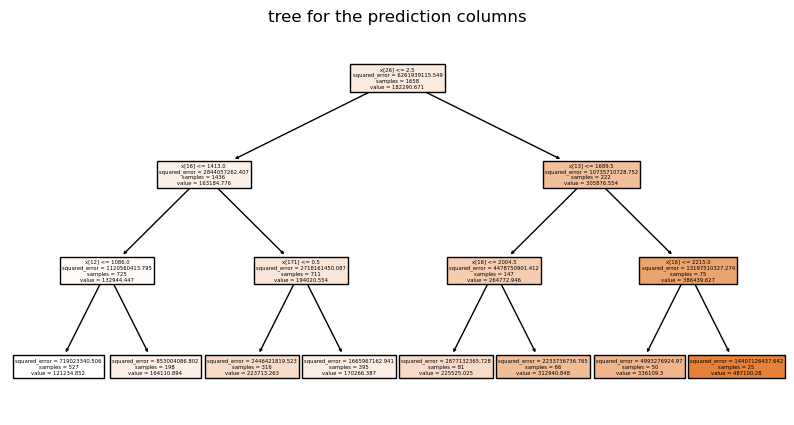

In [73]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
clf = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
plot_tree(clf,filled=True)
plt.title("tree for the prediction columns")

# FEATURE SELECTION:

In [65]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
GarageCars,0.377871
GrLivArea,0.226583
1stFlrSF,0.076039
ExterQual_TA,0.049528
TotalBsmtSF,0.036261
...,...
Condition2_PosN,0.000000
Condition2_RRAe,0.000000
ExterCond_Po,0.000000
Condition2_RRNn,0.000000


In [66]:
# Assuming dtree.feature_importances_ is a list or array containing feature importances
# and x.columns is a list of column names
feature_importances = dtree.feature_importances_
columns = x.columns
# Create a DataFrame with feature importances and column names
feature_importance_df = pd.DataFrame({'col_name': feature_importances}, index=columns)
# Filter out columns with feature importance of 0
zero_importance_df = feature_importance_df[feature_importance_df['col_name'] == 0]
# Display the columns with feature importance of 0
print(zero_importance_df)

                      col_name
BsmtHalfBath               0.0
PoolArea                   0.0
Zone_Class_C (all)         0.0
Road_Type_Grvl             0.0
Road_Type_Pave             0.0
...                        ...
SaleType_ConLI             0.0
SaleType_ConLw             0.0
SaleType_New               0.0
SaleType_Oth               0.0
SaleCondition_Alloca       0.0

[110 rows x 1 columns]


In [67]:
zero_importance_df

,col_name
BsmtHalfBath,0.0
PoolArea,0.0
Zone_Class_C (all),0.0
Road_Type_Grvl,0.0
Road_Type_Pave,0.0
...,...
SaleType_ConLI,0.0
SaleType_ConLw,0.0
SaleType_New,0.0
SaleType_Oth,0.0


In [78]:
#Dropping some features
train_enc.drop(['3SsnPorch',
'MiscVal',
'Zone_Class_RH',
'Road_Type_Grvl',
'Road_Type_Pave',
'Property_Shape_IR3',
'LandContour_Bnk' ,
'Utilities_AllPub',
'Utilities_NoSeWa',
'LotConfig_FR3' ,
'LandSlope_Sev' ,
'Neighborhood_Blueste',
'Neighborhood_BrDale' ,
'Neighborhood_MeadowV',
'Condition1_PosA' ,
'Condition1_PosN' ,
'Condition1_RRAe' ,
'Condition1_RRAn' ,
'Condition1_RRNn' ,
'Condition2_Artery',
'Condition2_Feedr'  ,
'Condition2_Norm' ,
'Condition2_PosA' ,
'Condition2_PosN' ,
'Condition2_RRAe',
'Condition2_RRAn' ,
'Condition2_RRNn' ,
'Dwelling_Type_Duplex',
'HouseStyle_2.5Fin',
'HouseStyle_SFoyer' ,
'RoofStyle_Flat'  ,
'RoofStyle_Mansard',
'RoofStyle_Shed'  ,
'RoofMatl_Membran',
'RoofMatl_Metal'  ,
'RoofMatl_Roll' ,
'RoofMatl_Tar&Grv' ,
'RoofMatl_WdShake',
'RoofMatl_WdShngl',
'Exterior1st_AsbShng',
'Exterior1st_AsphShn' ,
'Exterior1st_BrkComm' ,
'Exterior1st_CBlock'  ,
'Exterior1st_Stucco'  ,
'Exterior2nd_AsphShn' ,
'Exterior2nd_CBlock'  ,
'Exterior2nd_Other' ,
'Exterior2nd_Stone' ,
'Exterior2nd_Stucco',
'ExterCond_Ex',
'ExterCond_Fa',
'ExterCond_Po'  ,
'Foundation_Slab',
'Foundation_Stone',
'Foundation_Wood' ,
'BsmtQual_Fa' ,
'BsmtCond_Gd' ,
'BsmtCond_Po' ,
'BsmtFinType2_ALQ',
'BsmtFinType2_GLQ',
'BsmtFinType2_Unf',
'Heating_Floor' ,
'Heating_GasW'  ,
'Heating_OthW'  ,
'Heating_Wall'  ,
'HeatingQC_Fa'  ,
'HeatingQC_Po'  ,
'Electrical_Mix',
'Functional_Maj1' ,
'Functional_Maj2' ,
'Functional_Min1' ,
'Functional_Mod'  ,
'Functional_Sev'  ,
'SaleType_COD'  ,
'SaleType_CWD',
'SaleType_Con',
'SaleType_ConLD',
'SaleType_ConLI',
'SaleType_ConLw',
'SaleType_New'  ,
'SaleCondition_AdjLand' ,
'SaleCondition_Alloca'],inplace = True, axis=1)

In [79]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Columns: 208 entries, Id to SaleCondition_Partial
dtypes: int32(3), int64(33), uint8(172)
memory usage: 907.1 KB


Dividing x and y

In [80]:
y=train_enc['Property_Sale_Price']
x=train_enc.drop('Property_Sale_Price',axis=1)

In [81]:
print(y.shape)
print(x.shape)

(2073,)
(2073, 207)


# Train Test Split:

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [83]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1658, 207)
(1658,)
(415, 207)
(415,)


In [84]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
print(lr.intercept_)

140575.63878103666


In [86]:
print(lr.coef_)

[-1.43548667e+00 -1.75289191e+00 -9.68819217e+00  3.21408022e-01
  8.81076290e+02  2.25689300e+03  2.35756037e+01  9.62499490e+01
  2.29677556e+01  1.23612874e+01  1.24520518e+01 -2.06613638e+00
  2.27471739e+01  2.30836965e+01  2.44146528e+01 -2.58643448e+01
  2.16339900e+01  1.09280230e+03  2.33000578e+02  6.37941021e+03
  4.22803789e+03 -3.28028555e+03 -1.16952680e+04  2.92552035e+03
  8.87362973e+03 -5.99985803e+01  4.65639732e+03  1.38449569e+01
  1.73175969e+01  7.41177592e+00  9.17905376e+00  2.24516275e+01
  9.44334872e+01 -3.26103799e+02 -1.24824914e+02 -3.31349697e+04
 -9.87533304e+03 -7.38118674e+03 -6.98251257e+03  9.31967890e+01
  7.65267645e+03 -1.55855504e+04 -8.91417024e+03 -1.39844174e+04
  1.40613333e+04  1.65566577e+03  9.28763301e+03  6.10969121e+03
  1.28968372e+04 -2.17061075e+03  4.98927550e+03  2.84930248e+04
  3.26647163e+04  7.30521633e+01 -1.09433248e+04 -1.09221077e+04
 -6.29569048e+03  1.43635255e+04 -2.61803059e+04 -8.00067441e+03
 -1.99400687e+04 -1.76030

In [87]:
for coef, feature in zip(lr.coef_, x_train.columns):
    print(f"{feature}: {coef:.2f}")  # Format to 2 decimal places

Id: -1.44
Dwell_Type: -1.75
LotFrontage: -9.69
LotArea: 0.32
OverallQual: 881.08
OverallCond: 2256.89
YearBuilt: 23.58
YearRemodAdd: 96.25
MasVnrArea: 22.97
BsmtFinSF1: 12.36
BsmtFinSF2: 12.45
BsmtUnfSF: -2.07
TotalBsmtSF: 22.75
1stFlrSF: 23.08
2ndFlrSF: 24.41
LowQualFinSF: -25.86
GrLivArea: 21.63
BsmtFullBath: 1092.80
BsmtHalfBath: 233.00
FullBath: 6379.41
HalfBath: 4228.04
BedroomAbvGr: -3280.29
KitchenAbvGr: -11695.27
TotRmsAbvGrd: 2925.52
Fireplaces: 8873.63
GarageYrBlt: -60.00
GarageCars: 4656.40
GarageArea: 13.84
WoodDeckSF: 17.32
OpenPorchSF: 7.41
EnclosedPorch: 9.18
ScreenPorch: 22.45
PoolArea: 94.43
MoSold: -326.10
YrSold: -124.82
Zone_Class_C (all): -33134.97
Zone_Class_FV: -9875.33
Zone_Class_RL: -7381.19
Zone_Class_RM: -6982.51
Alley_Grvl: 93.20
Alley_Pave: 7652.68
Property_Shape_IR1: -15585.55
Property_Shape_IR2: -8914.17
Property_Shape_Reg: -13984.42
LandContour_HLS: 14061.33
LandContour_Low: 1655.67
LandContour_Lvl: 9287.63
LotConfig_Corner: 6109.69
LotConfig_CulDSac: 12

In [88]:
y_hat_train=lr.predict(x_train)
y_hat_test=lr.predict(x_test)

In [89]:
y_hat_train #predicted

array([203794.0615719 , 126267.04397948, 148081.48267846, ...,
       166648.65281959, 114878.64471025, 179407.24000676])

In [91]:
rms_train=np.sqrt(mean_squared_error(y_train,y_hat_train))
print("The Rms for the model is",round(rms_train,2))

The Rms for the model is 22417.39


In [92]:
rms_test=np.sqrt(mean_squared_error(y_test,y_hat_test))
print("The Rms for the model is",round(rms_test,2))

The Rms for the model is 26462.67


In [93]:
r2_score_train=(r2_score(y_train,y_hat_train))
print("The R2_score for the model is",round(r2_score_train,2))

The R2_score for the model is 0.92


In [94]:
r2_score_test=(r2_score(y_test,y_hat_test))
print("The R2_score for the model is",round(r2_score_test,2))

The R2_score for the model is 0.88


# DECISION TREE1:

In [95]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
#fit the model
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [96]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [97]:
print("r2 score of the model for train data is:",round(r2_score(y_train,y_hat_train_dtree),2))

r2 score of the model for train data is: 1.0


In [98]:
print("r2 score of the model for test data is:",round(r2_score(y_test,y_hat_test_dtree),2))

r2 score of the model for test data is: 0.83


In [99]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_hat_train_dtree))
print(round(rmse_train,2))

0.0


In [100]:
rmse_test_model = np.sqrt(mean_squared_error(y_test,y_hat_test_dtree))
print(round(rmse_test_model,2))

31519.82


Text(0.5, 1.0, 'tree for the prediction columns')

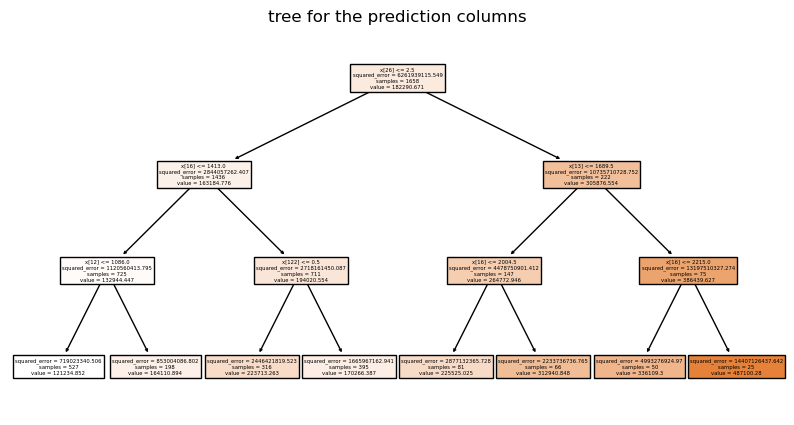

In [101]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
clf = DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("tree for the prediction columns")